# Task:2

# Eye State Detection Project

## Task : Design a system that detects drowsiness in a user by analyzing their eye state (open or closed) in real-time.

# Importing Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from glob import glob
import cv2
import random,os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,MaxPool2D
from tensorflow.keras.layers import BatchNormalization,Activation
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from keras.layers import Input
from tensorflow.keras.layers import Conv2D,Convolution1D
from IPython.display import SVG,Image
import tensorflow as tf
print("Tensorflow_version:",tf.__version__)
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Tensorflow_version: 2.11.1


# Loading dataset

In [2]:
# Getting training set

img_size=48
batch_size=64
datagen_train=ImageDataGenerator()
train_generator=datagen_train.flow_from_directory(r"C:\Users\shailesh mhalsekar\Downloads\eye-detection\train",target_size=(img_size,img_size),
                                                 color_mode="grayscale",
                                                 batch_size=batch_size,
                                                 class_mode="categorical",
                                                 shuffle=True)

Found 8749 images belonging to 2 classes.


In [3]:
# Getting validation set

datagen_validation=ImageDataGenerator()
validation_generator=datagen_validation.flow_from_directory(r"C:\Users\shailesh mhalsekar\Downloads\eye-detection\test",target_size=(img_size,img_size),
                                                 color_mode="grayscale",
                                                 batch_size=batch_size,
                                                 class_mode="categorical",
                                                 shuffle=True)

Found 2018 images belonging to 2 classes.


# Defining model

In [4]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size,padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    return x

In [5]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    return x

In [6]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,64,(3,3))
    conv_2 = Convolution(conv_1,128,(5,5))
    conv_3 = Convolution(conv_2,512,(3,3))
    conv_4 = Convolution(conv_3,512,(3,3))
    
    flatten = Flatten()(conv_4)
    dense_1 = Dense_f(flatten,256)
    dense_2 = Dense_f(dense_1,512)
    output = Dense(2,activation = 'softmax')(dense_2)
    
    model = Model(inputs = [inputs], outputs = [output])
    
    opt = Adam(lr = 0.0005)
    model.compile(loss = ['categorical_crossentropy'], optimizer = opt,
                          metrics = ['accuracy'])
    return model   

# Getting summary of the model

In [7]:
model = model_fer((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0     

# Initialization of model



In [8]:
epochs = 10 # initializing number of epochs
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint('model_weights.h5',monitor = 'val_accuracy', 
                              save_weights_only = True, mode = 'max', 
                              verbose = 1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience = 2, min_lr = 0.00001)
callbacks = [checkpoint,reduce_lr]

# Model Training

In [9]:
history=model.fit(x=train_generator,steps_per_epoch=steps_per_epoch,epochs=epochs,
                 validation_data=validation_generator,validation_steps=validation_steps,
                 callbacks=callbacks)

Epoch 1/10
136/136 [==============================] - ETA: 0s - loss: 0.1546 - accuracy: 0.9383
Epoch 1: saving model to model_weights.h5
136/136 [==============================] - 349s 2s/step - loss: 0.1546 - accuracy: 0.9383 - val_loss: 0.5016 - val_accuracy: 0.9073 - lr: 0.0010
Epoch 2/10
136/136 [==============================] - ETA: 0s - loss: 0.0460 - accuracy: 0.9835
Epoch 2: saving model to model_weights.h5
136/136 [==============================] - 311s 2s/step - loss: 0.0460 - accuracy: 0.9835 - val_loss: 0.1207 - val_accuracy: 0.9652 - lr: 0.0010
Epoch 3/10
136/136 [==============================] - ETA: 0s - loss: 0.0246 - accuracy: 0.9910
Epoch 3: saving model to model_weights.h5
136/136 [==============================] - 316s 2s/step - loss: 0.0246 - accuracy: 0.9910 - val_loss: 0.1329 - val_accuracy: 0.9708 - lr: 0.0010
Epoch 4/10
136/136 [==============================] - ETA: 0s - loss: 0.0194 - accuracy: 0.9929
Epoch 4: saving model to model_weights.h5
136/136 [====

# Evaluation of model

In [10]:
model.evaluate(validation_generator)

32/32 [==============================] - 14s 433ms/step - loss: 0.1107 - accuracy: 0.9742


[0.11071796715259552, 0.9742318987846375]

# Plotting Loss

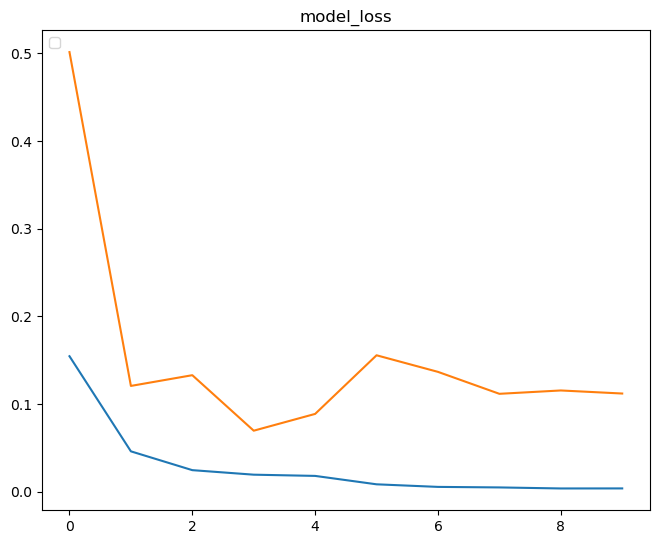

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.legend('train','validation',loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)


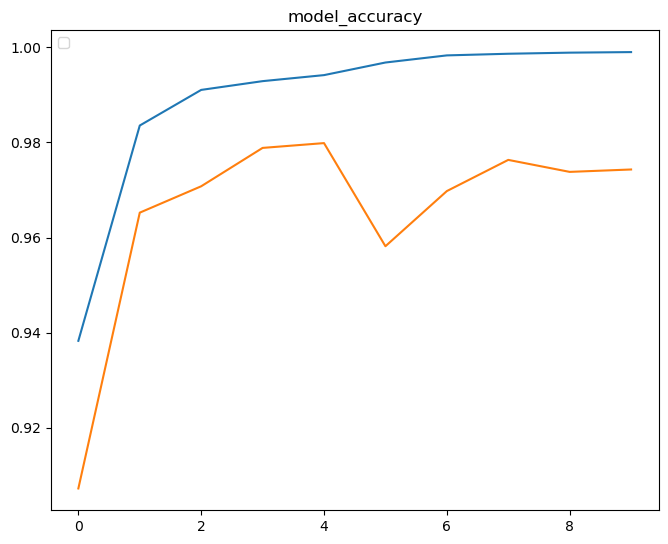

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.legend('train','validation',loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)


# saving the model

In [13]:
model_json = model.to_json()
with open('model_a.json','w') as json_file:
    json_file.write(model_json)